<a href="https://colab.research.google.com/github/adyaomnkar/Quantum_ML/blob/main/QML1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quantum Computing For QML using qiskit


In [ ]:
from qiskit_aer import AerSimulator

In [ ]:
#import Quantum circuit from qiskit and Quantum_info helps us to play with the qc
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi



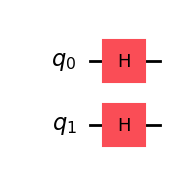

In [ ]:
#Create a Quantum Circuit with 2 qubits
qc=QuantumCircuit(2)

#apply Hadamard gate to the qubit
qc.h([1,0])

#Draw the Qubit
qc.draw(output='mpl')

In [ ]:

from qiskit.quantum_info import Statevectort

In [ ]:
sv=Statevector(qc)
sv

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


In [ ]:
sv.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
ψ =qi.Statevector(qc)
ψ.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
probs=ψ.probabilities()
print(probs)

[0.25 0.25 0.25 0.25]


In [ ]:
counts=ψ.sample_counts(shots=1024)
print(counts)

{'00': 236, '01': 260, '10': 274, '11': 254}


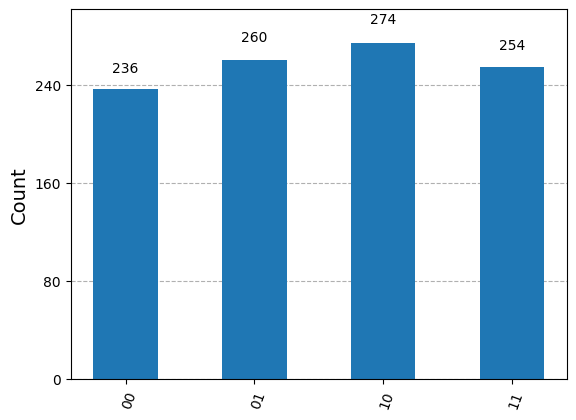

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [ ]:
samples=ψ.sample_memory(shots=10)
print(samples)

['11' '10' '10' '00' '01' '10' '10' '00' '00' '11']


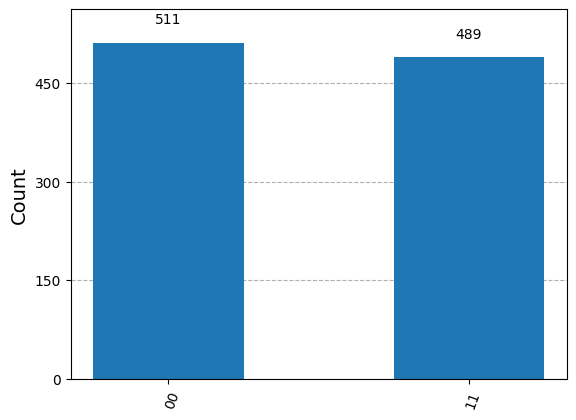

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Set up a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# Apply a Hadamard gate to put qubit 0 into a superposition state
qc.h(0)

# Apply a CNOT gate as an entangler
qc.cx(0, 1)

# Perform a measurement
qc.measure_all()

# Execute the circuit on a quantum simulator
simulator = AerSimulator()
result = simulator.run(qc, shots=1000).result()

# Collect results and plot
counts = result.get_counts()
plot_histogram(counts)

# Display the plot
# plt.show()


In [ ]:
#dt 17/02/2025
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi

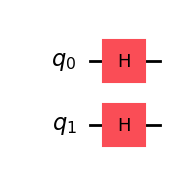

In [ ]:
qc=QuantumCircuit(2)
qc.h([0,1])
qc.draw(output='mpl')

In [ ]:
ψ=qi.Statevector(qc)
ψ.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
probs=ψ.probabilities()

In [ ]:
probs

array([0.25, 0.25, 0.25, 0.25])

In [ ]:
counts=qi.Statevector(qc).sample_counts(shots=1024)

In [ ]:
counts

{'00': 254, '01': 257, '10': 256, '11': 257}

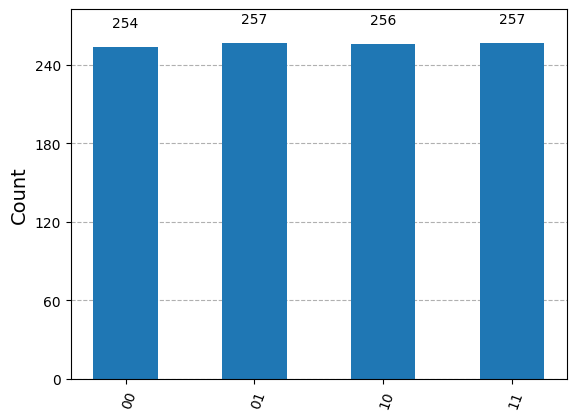

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [ ]:
samples=ψ.sample_memory(shots=10)
print(samples)

['01' '10' '10' '10' '11' '11' '00' '10' '00' '00']


In [ ]:
o=qi.SparsePauliOp(['ZZ','XX','II'],[0.2,-0.3,0.4])
o.to_operator()

Operator([[ 0.6+0.j,  0. +0.j,  0. +0.j, -0.3+0.j],
          [ 0. +0.j,  0.2+0.j, -0.3+0.j,  0. +0.j],
          [ 0. +0.j, -0.3+0.j,  0.2+0.j,  0. +0.j],
          [-0.3+0.j,  0. +0.j,  0. +0.j,  0.6+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [ ]:
o_exp=ψ.expectation_value(o)
print(o_exp)

(0.09999999999999998+0j)


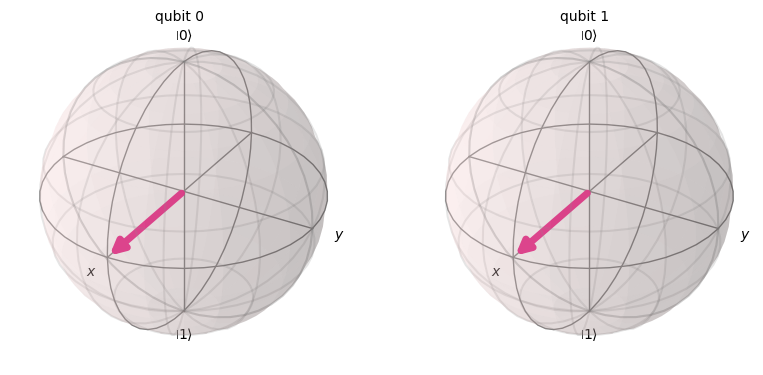

In [ ]:
ψ.draw('bloch')

In [ ]:
ρ=qi.DensityMatrix(qc)


In [ ]:
ρ

DensityMatrix([[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j],
               [0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j],
               [0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j],
               [0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j]],
              dims=(2, 2))


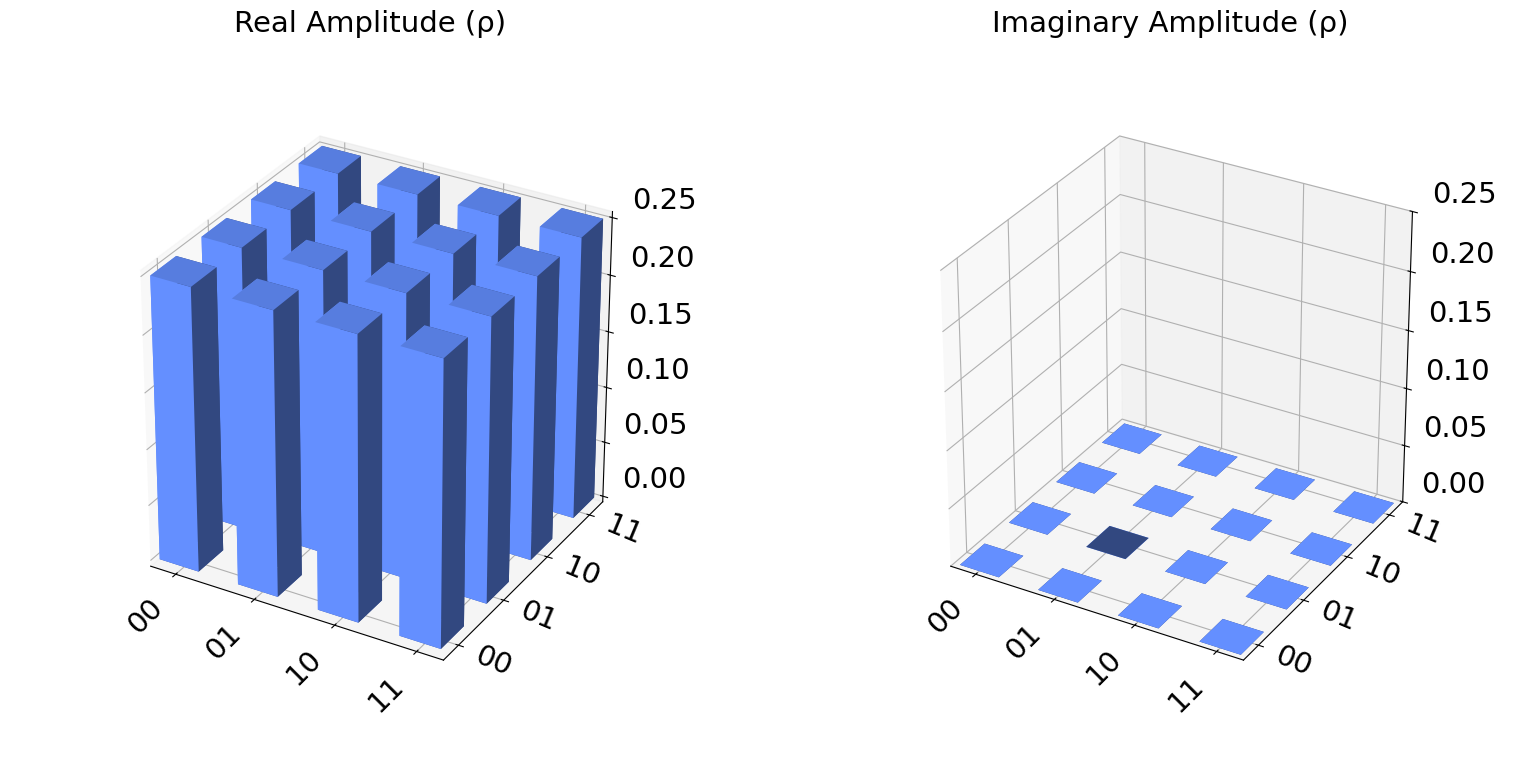

In [ ]:
ρ.draw('city')

In [ ]:
ρ1=qi.partial_trace(ρ ,[0])
ρ1

DensityMatrix([[0.5+0.j, 0.5+0.j],
               [0.5+0.j, 0.5+0.j]],
              dims=(2,))


In [ ]:
U=qi.Operator(qc)
U

Operator([[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
          [ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
          [ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
          [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


/var/folders/1y/xs1pr7ms3hscw49_8bphmf1r0000gn/T/ipykernel_28634/1751979134.py:4: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.x(0).c_if(1,1)


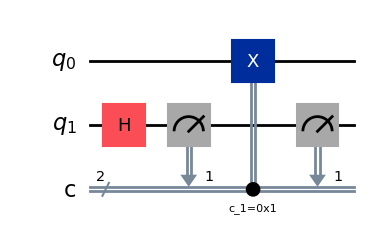

In [ ]:
qc=QuantumCircuit(2,2)
qc.h(1)
qc.measure(1,1)
qc.x(0).c_if(1,1)
qc.measure(1,1)
qc.draw(output='mpl')